<a href="https://colab.research.google.com/github/michaelwnau/_my_notebooks_ML_data_science/blob/main/_name_binary_tree_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter your first name: Nina
Enter your last name: Simone
The graph is not a binary tree.


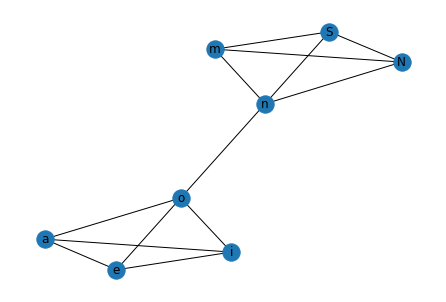

In [1]:
#_____Takes first_name and last_name and generates a graph by parsing the two 
# strings to separate vowels and consonants into two poles and then
# checking is_binary_tree function


import networkx as nx
import numpy as np
from collections import defaultdict

class Tree:
    def __init__(self):
        self.tree = defaultdict(list)

    def addEdge(self, u, v):
        self.tree[u].append(v)

    def __str__(self):
        s = ""
        for i in self.tree:
            s += f'\n {i} -> {self.tree[i]}'
        return s

    def is_binary_tree(self, root):
        if not self.tree[root]:
            return True
        elif len(self.tree[root]) == 1:
            return self.is_binary_tree(self.tree[root][0])
        elif len(self.tree[root]) == 2:
            left_child, right_child = self.tree[root]
            return self.is_binary_tree(left_child) and self.is_binary_tree(right_child)
        else:
            return False

# Get the user's first and last names
first_name = input("Enter your first name: ")
last_name = input("Enter your last name: ")

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph and label them with the corresponding letters
for letter in first_name + last_name:
    G.add_node(letter)

# Separate the nodes into two groups (vowels and consonants)
vowels = set(['a', 'e', 'i', 'o', 'u'])
consonants = set(first_name + last_name) - vowels

# Extract vowels from the user input
user_vowels = set(filter(lambda x: x in vowels, first_name + last_name))

# Connect consonants to consonants and vowels to vowels
for u in user_vowels:
    for v in user_vowels:
        if u != v:
            G.add_edge(u, v)

for u in consonants:
    for v in consonants:
        if u != v:
            G.add_edge(u, v)

# Add one random edge between the two groups
u = np.random.choice(list(user_vowels))
v = np.random.choice(list(consonants))
G.add_edge(u, v)

# Check if the resulting diagram is a binary tree
tree = Tree()
for u, v in G.edges:
    tree.addEdge(u, v)
root = next(iter(user_vowels))
is_binary_tree = tree.is_binary_tree(root)

# Draw and display the graph
nx.draw(G, with_labels=True)
print(f"The graph is {'a binary tree' if is_binary_tree else 'not a binary tree'}.")
